In [1]:
import sys
sys.path.insert(0, '../scripts')

from accuracy import count_error_rate, draw_left_right_error, draw_mean_error_rate, graph_cumulative_acc
import paths
import intervals as invs
from preprocessing import read_csv_clean

In [2]:
ctrl_ending_corr = []
exp_ending_corr = []

def read_and_record(path:str, ending_corr:list, dict_corr:list):
    df = read_csv_clean(path, cumulative_accuracy=True, convert_large=True)
    value = df['Percent_Correct'].tail(1).values[0]
    ending_corr.append(value)
    return df

In [4]:
ctrl_list = []
exp_list = []

for path in paths.reversal_ivsa_ctrl:
    ctrl_list.append(read_and_record(path, ctrl_ending_corr, None))
for path in paths.reversal_ivsa_exp:
    exp_list.append(read_and_record(path, exp_ending_corr, None))

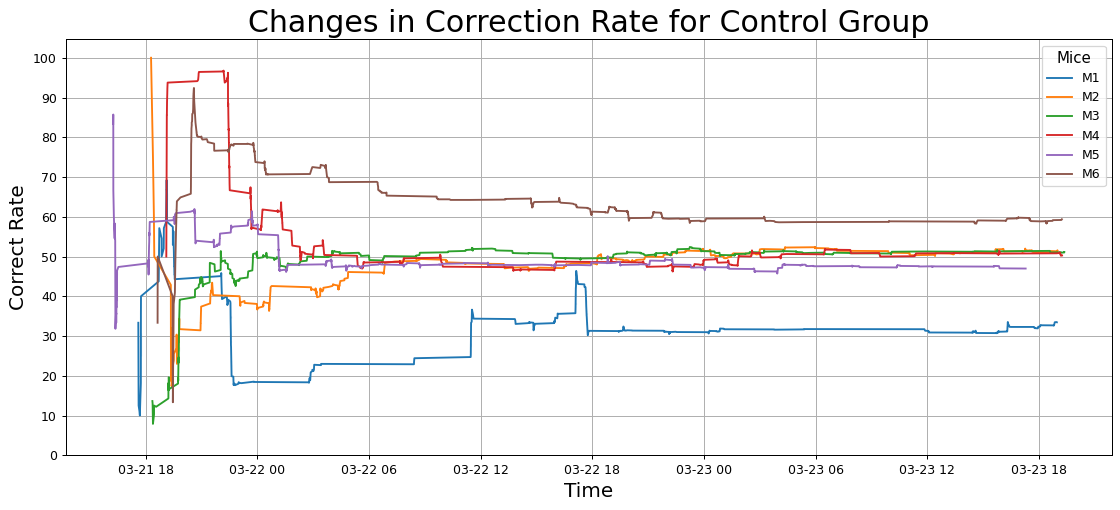

In [5]:
graph_cumulative_acc(ctrl_list, 'Control')

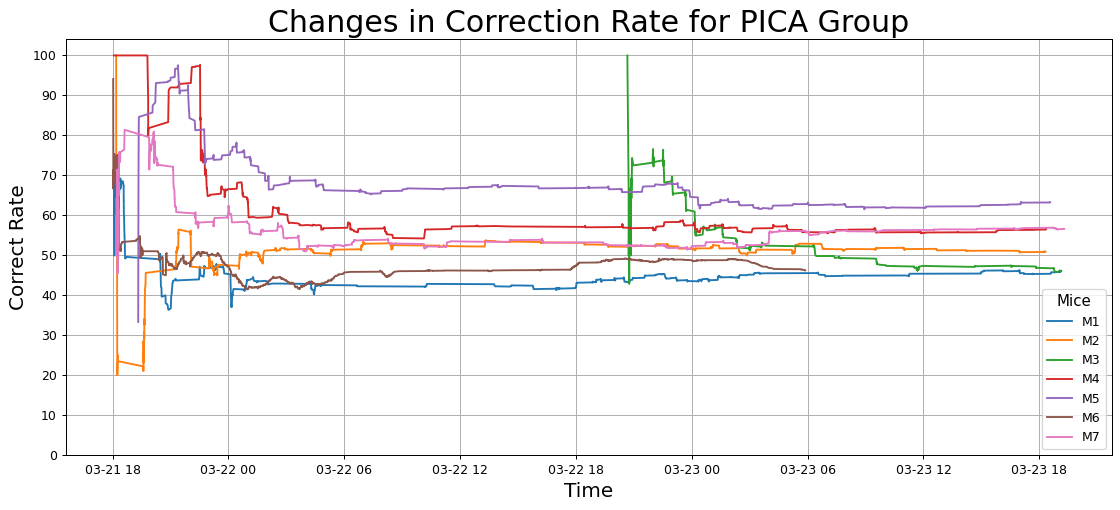

In [7]:
graph_cumulative_acc(exp_list, 'PICA')

In [6]:
invs.perform_T_test(ctrl_ending_corr, exp_ending_corr)

P Value is  0.5831231617625033
There is no significant difference between the two groups.


In [2]:
# index 0 is control, index 1 is experiment
left_rate = [[], []]
right_rate = [[], []]
ctrl = []
exp = []

In [3]:
for path in paths.reversal_ivsa_ctrl:
    try:
        df = read_csv_clean(path=path)
        rateL, rateR, overall = count_error_rate(df, overall_accuracy=True)
        left_rate[0].append(rateL)
        right_rate[0].append(rateR)
        ctrl.append(overall)
    except:
        pass

for path in paths.reversal_ivsa_exp:
    df = read_csv_clean(path=path)
    rateL, rateR, overall = count_error_rate(df, overall_accuracy=True)
    left_rate[1].append(rateL)
    right_rate[1].append(rateR)
    exp.append(overall)

Left Average: [0.4716666666666667, 0.4071428571428571]
Right Average: [0.41, 0.4585714285714286]
Left Standard Deviation: [0.06145007006595771, 0.0236758150374401]
Right Standard Deviation: [0.03660601043544625, 0.03887884547990514]


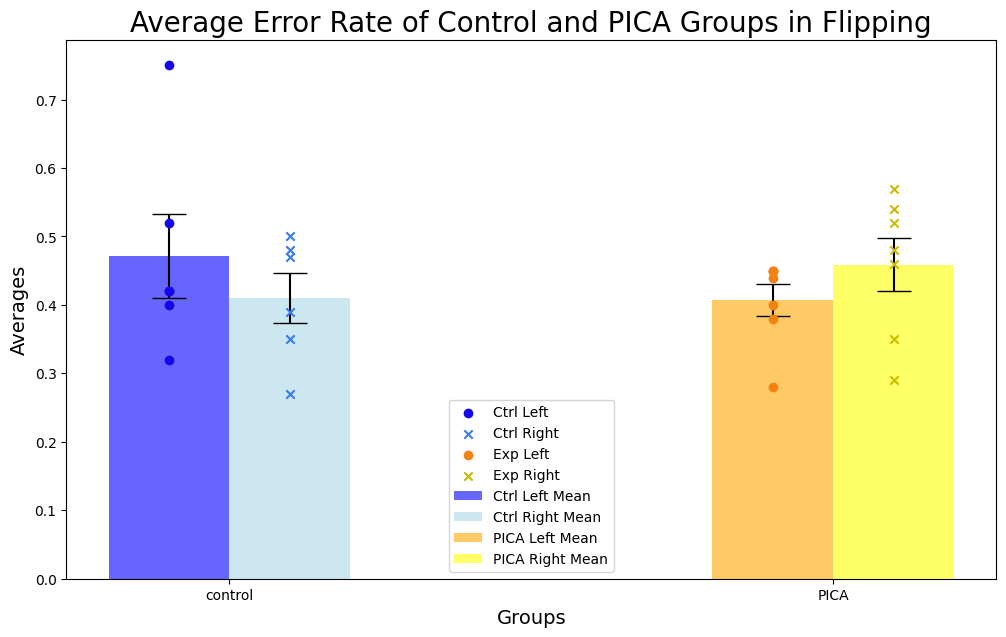

In [4]:
draw_left_right_error(left_rate, right_rate, groups=['control', 'PICA'], verbose=True)

Control Size: 6
PICA Size: 7
Control Average: 0.45500000000000007
PICA Average: 0.43999999999999995
Control Standard Deviation: 0.10483320084782301
PICA Standard Deviation: 0.03958114029012638


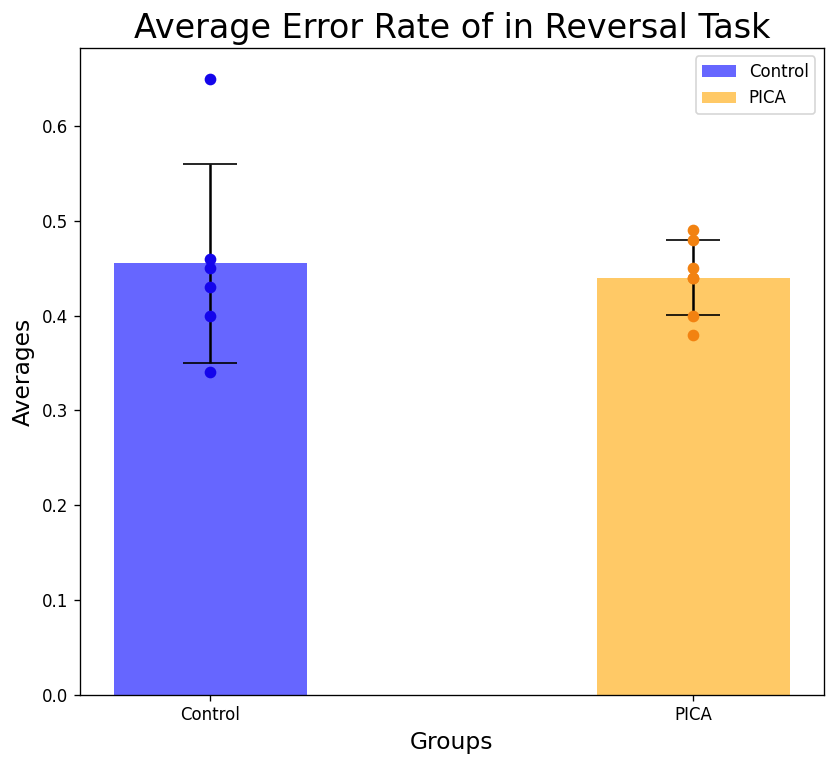

In [5]:
draw_mean_error_rate(ctrl, exp, dpi=120, groups=['Control', 'PICA'], bar_width=0.2, err_width=16, verbose=True)